<a href="https://colab.research.google.com/github/RizqiRHuda/PVCK_Semester5/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL11 – MetodeDeteksiObjek: TemplateMatching,Edge Detection,CornerDetection,GridDetection,ContourDetection**

Nama          : Rizqi Rohmatul Huda

Kelas         : TI-3C

Nomor Absen   : 21

NIM           : 2141720264

In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#akses drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.


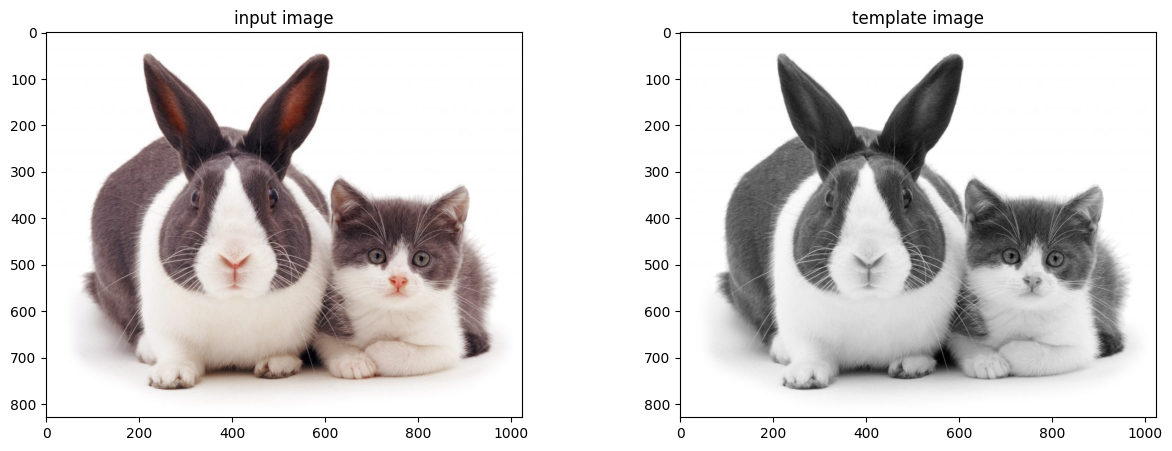

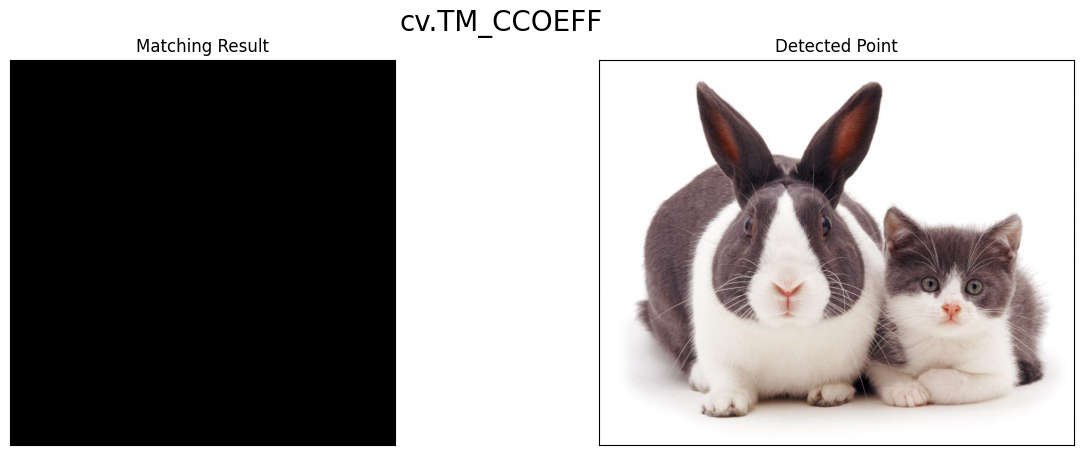

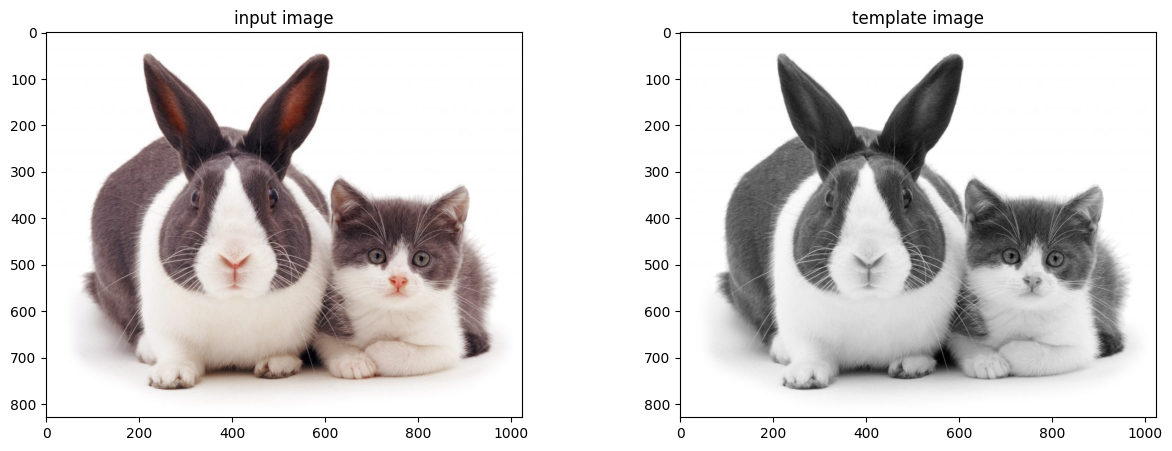

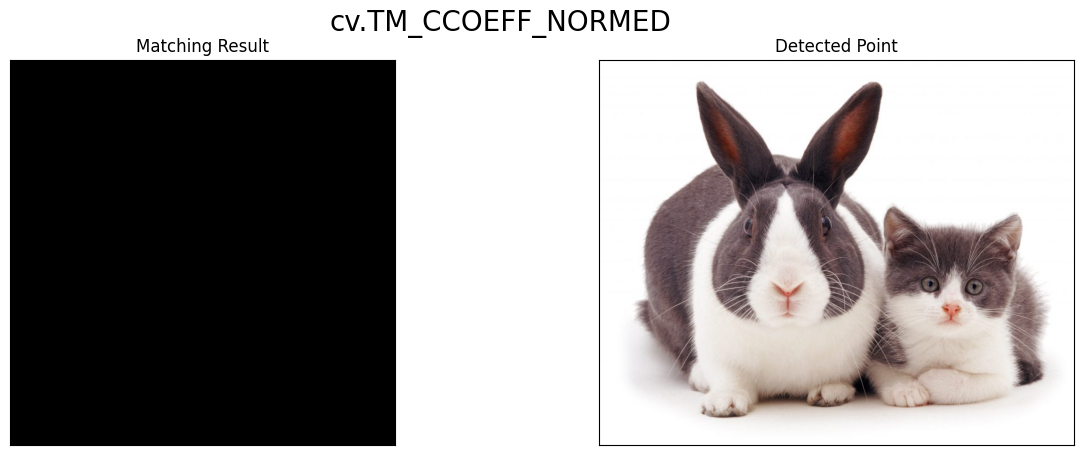

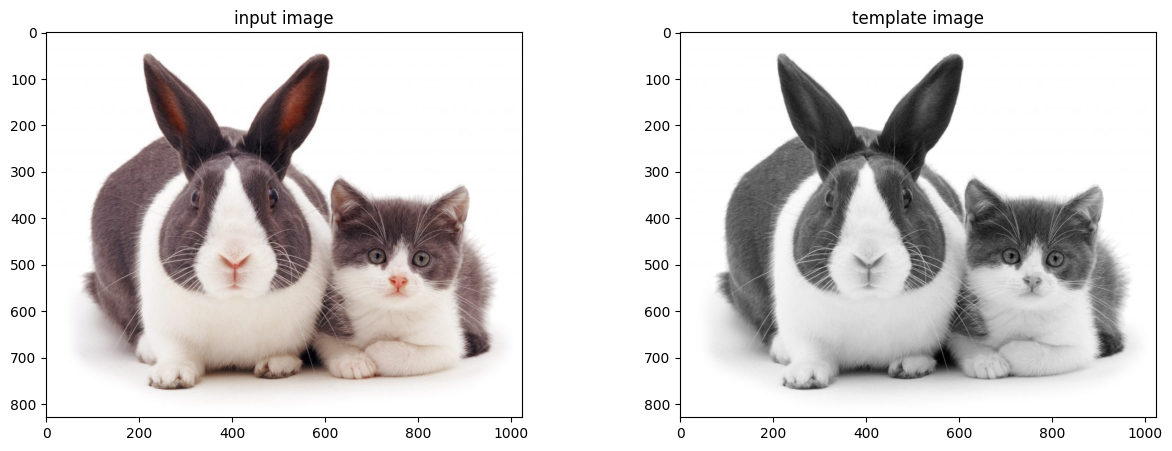

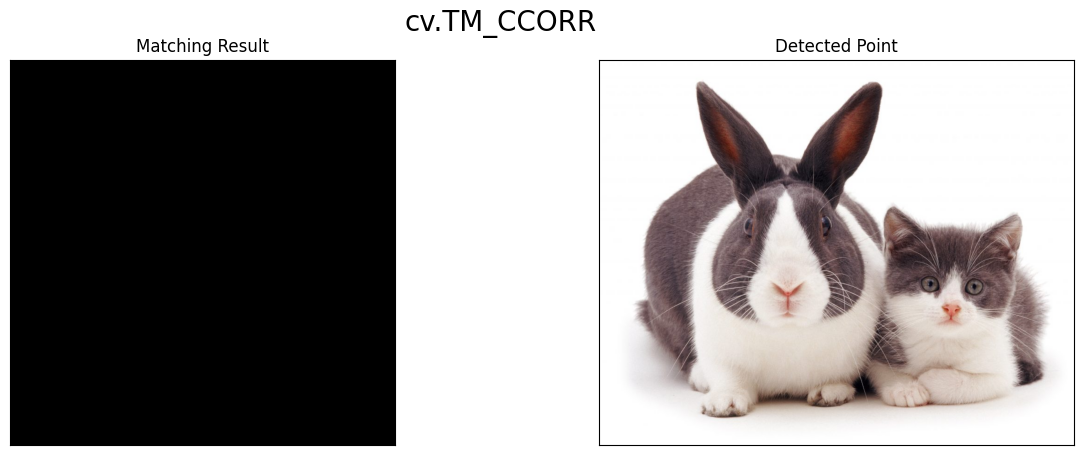

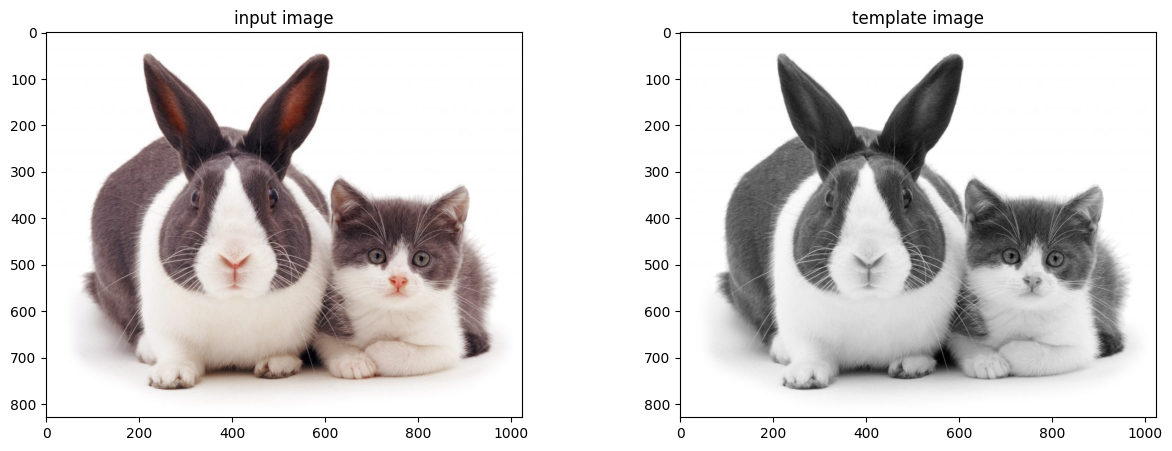

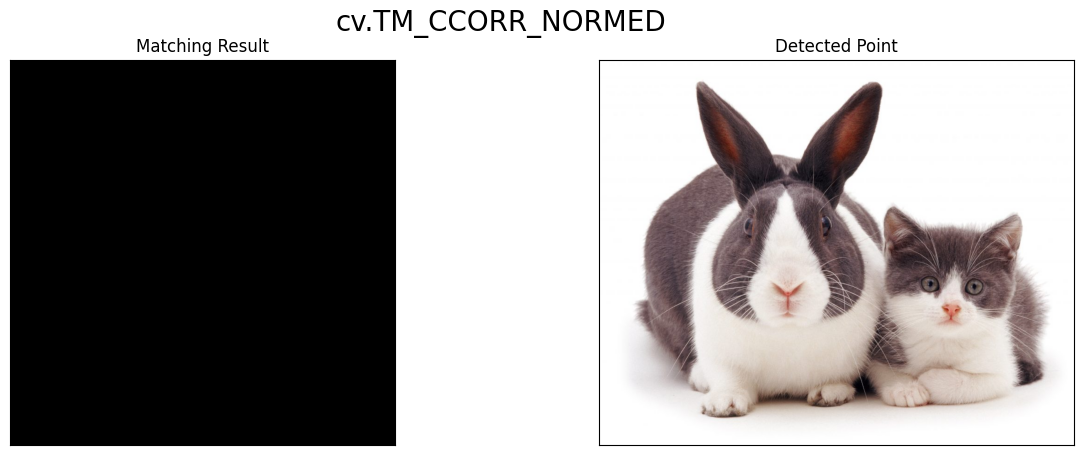

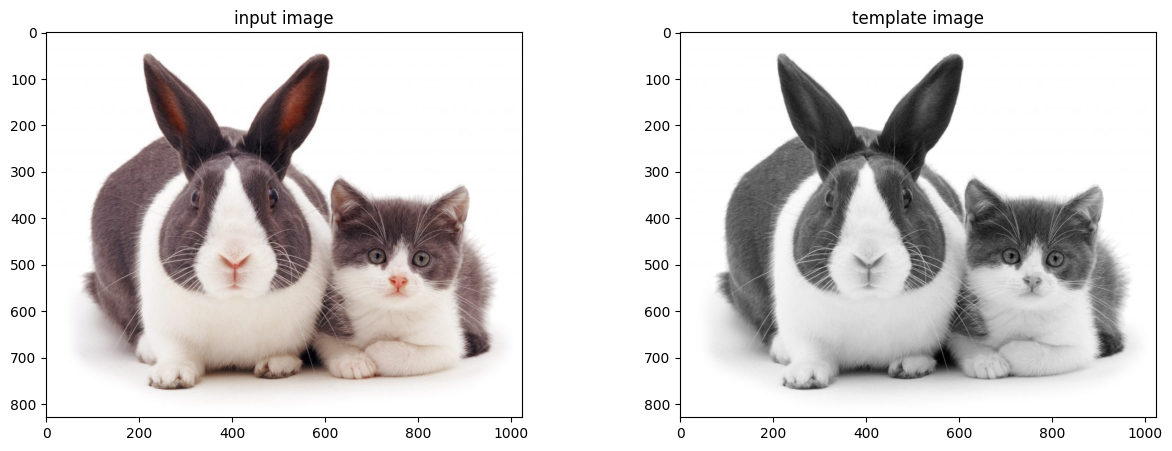

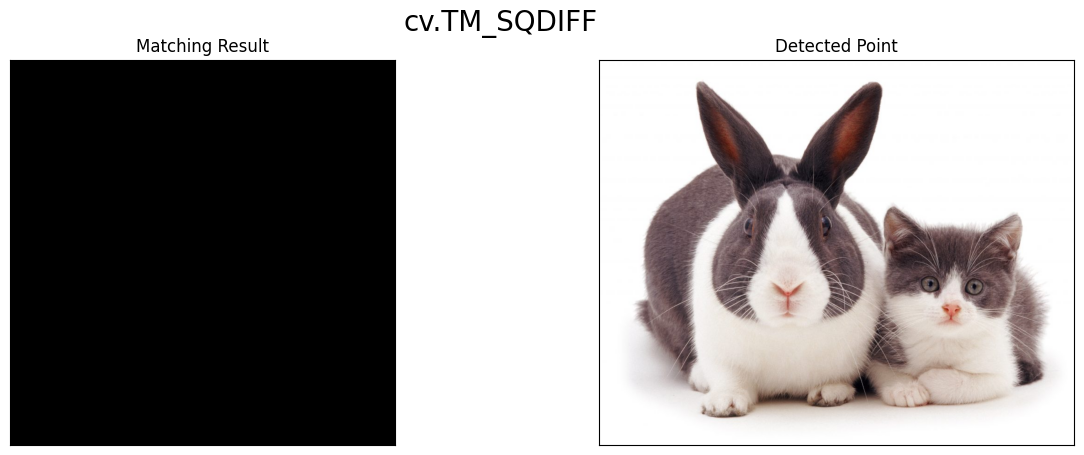

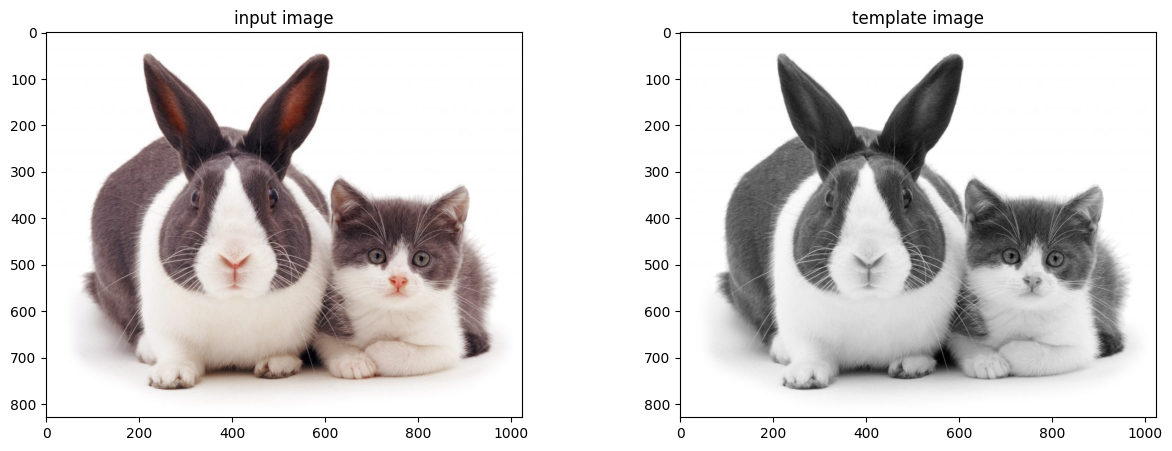

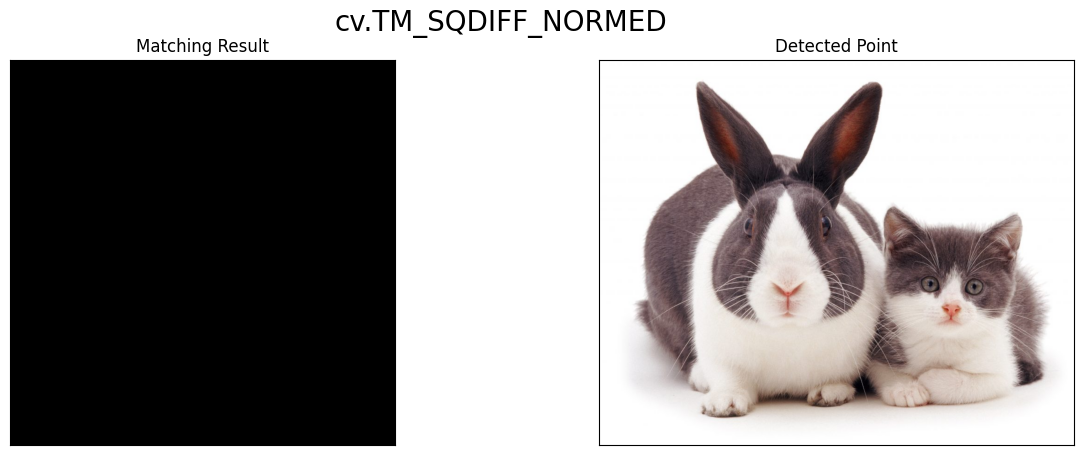

In [3]:
def template_matching(img, template, method):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_copy = img.copy()
    w, h = template.shape[::-1]

     # print input image dan template
    f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
    axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
    axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

    res = cv.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)


    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255))

    return img_copy, res

img = cv.imread('/content/drive/MyDrive/img_python/content/animal/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/img_python/content/animal/cats_and_bunnies.jpg', 0)

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for method_str in methods:
    method = eval(method_str)
    result_img, result_res = template_matching(img, template, method)

    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(result_res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method_str, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:


Text(0.5, 1.0, 'Template Image')

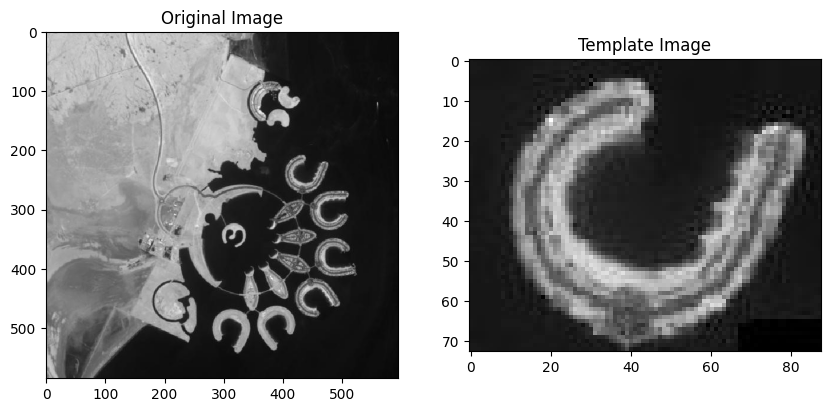

In [4]:
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/img_python/content/animal/bahrain.jpg',0)
template_img = cv.imread('/content/drive/MyDrive/img_python/content/animal/bahrain-template.jpg',0)

fig, axarr = plt.subplots(1, 2, figsize=(10, 6))
axarr[0].imshow(img, cmap='gray')
axarr[0].set_title("Original Image")
axarr[1].imshow(template_img, cmap='gray')
axarr[1].set_title("Template Image")

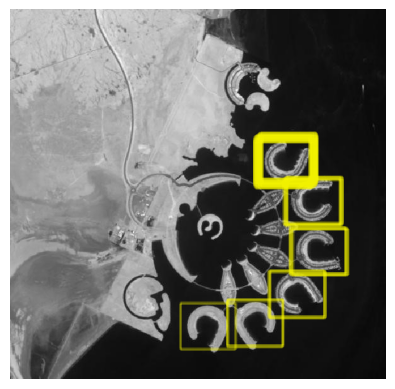

In [5]:
# menghitung kemiripan citra dengan template
result = match_template(img, template_img)

# menentukan hasil kecocokan
threshold = 0.45
locations = np.where(result >= threshold)

# menampilkan gambar kecocokan
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template_img.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

4. . Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

a. Sobel Edge Detection

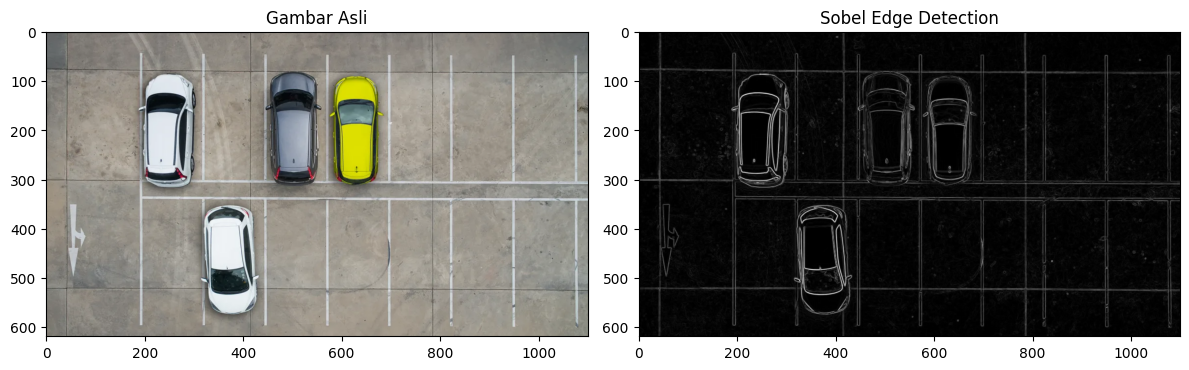

In [6]:
image = cv.imread('/content/drive/MyDrive/img_python/content/animal/car-park.jpg')

img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img_car = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menerapkan Sobel Edge Detection
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobel_x, sobel_y)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car, cmap='gray')
plt.title('Gambar Asli')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')

plt.tight_layout()
plt.show()

## **Tugas!**

Kelompok 5

In [7]:

!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (4,519 kB/s)
debconf: unable to ini

In [8]:
pip install pytesseract

In [13]:
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow


PROVINSI SUMATERA UTARA
KABUPATEN NIAS

 

NIK: 1201050503670001
Noma EDO FURNAMA
TempatiTgi Lahir : NAS, 05-03-1967
Jenis Katamin —: LAKI-LAKI Gol. Darah : B
Alamat 1 DUSUN II HILIHAMBAWA
RTRW 0017003
KelDesa —: HILIGODU TANOSEO
Kecamatan : HILIDUHO
Agama 1 KATHOLIK
Status Perkawinan: CERAI HIDUP
Pekerjaan : WARTAWAN NIAS
Kewarganegaraan: WNI Pein
Berlaku Hingga — : 05-03-2018 u "
3 X

“AA

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


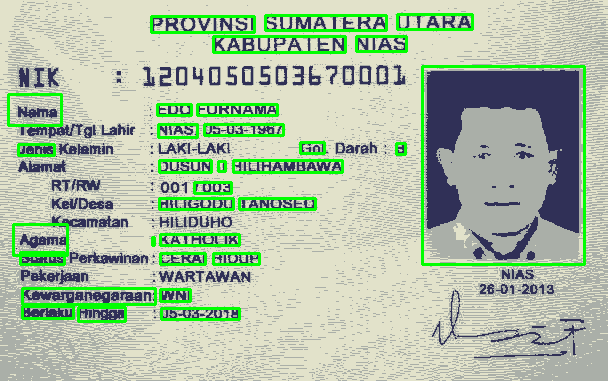

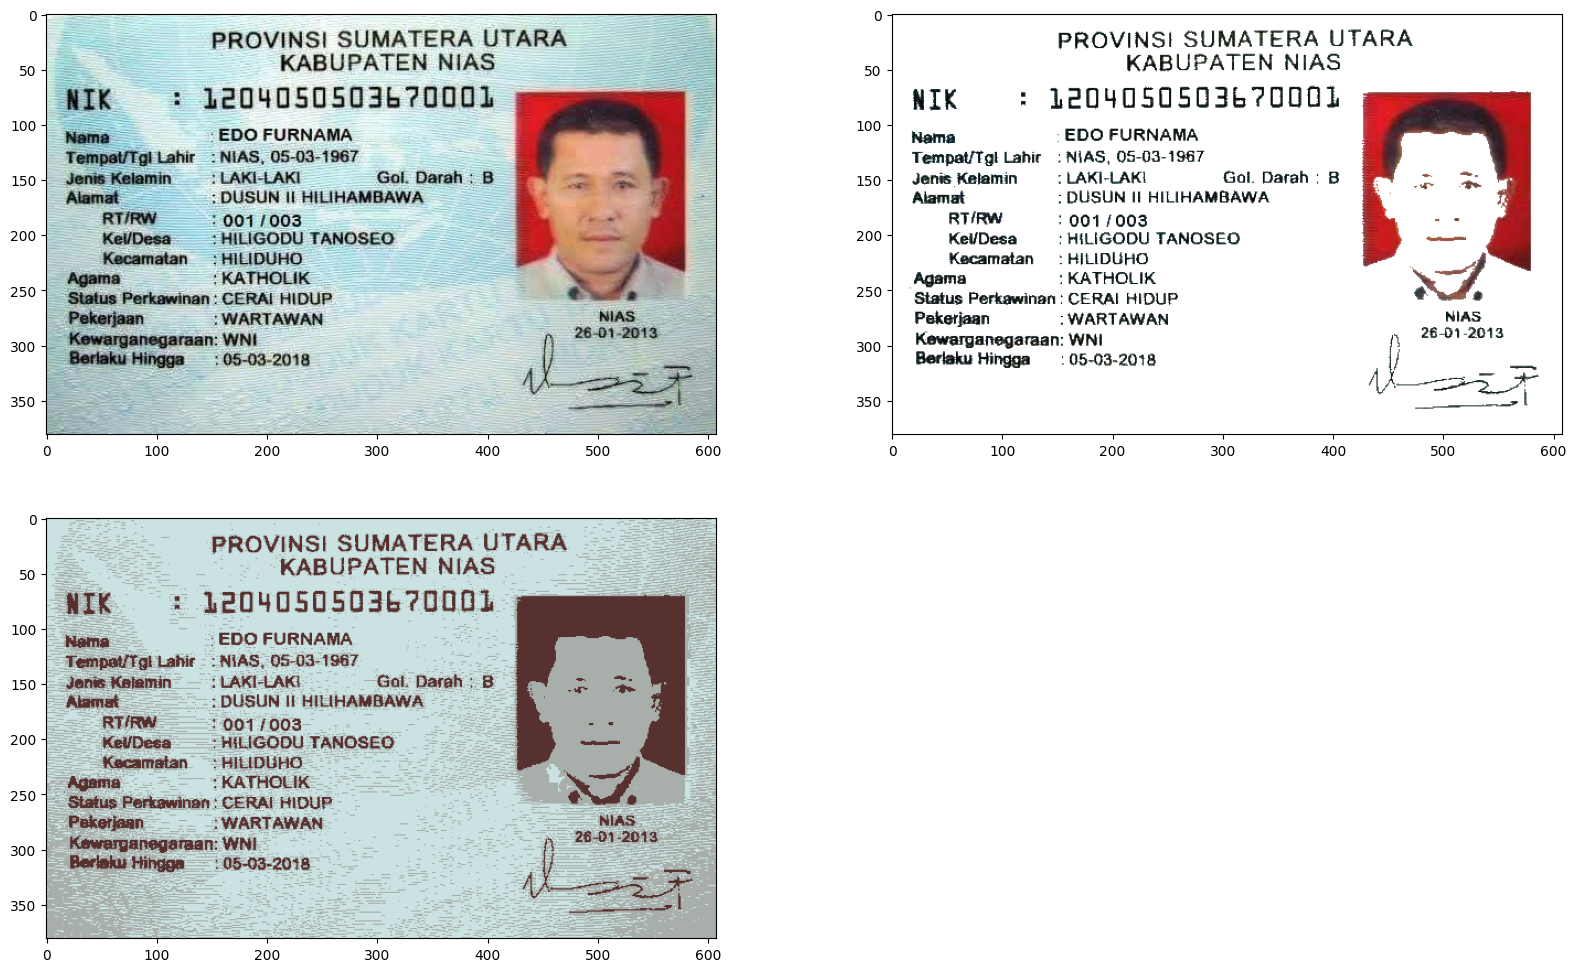

In [14]:

# Kmeans Image Segmentation
img = cv.imread('/content/drive/MyDrive/img_python/content/img_week7/ktp5.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape array ke bentuk 2D
pixel_val = img.reshape((-1, 3))
# convert to float
pixel_val = np.float32(pixel_val)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv.kmeans(pixel_val, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
# Konversi titik centroid ke dalam Integer
centers = np.uint8(centers)
# flattening label array
labels = labels.flatten()
# konversi warna pixel asli ke warna dari tiap centroidnya
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

masked_img = np.copy(img)
masked_img = masked_img.reshape((-1, 3))
# cluster = 2
masked_img[labels != 2] = [255, 255, 255]
masked_img = masked_img.reshape(img.shape)

plt.figure(figsize = (20, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(masked_img)
plt.subplot(2, 2, 3), plt.imshow(segmented_img)

gray = cv.cvtColor(segmented_img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

from pytesseract import Output
data = pytesseract.image_to_data(masked_img, output_type=Output.DICT)
print(data.keys())

n_box = len(text1['text'])
for i in range(n_box):
  if int(text1['conf'][i]) > 60:
    (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
    img = cv.rectangle(segmented_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(img)

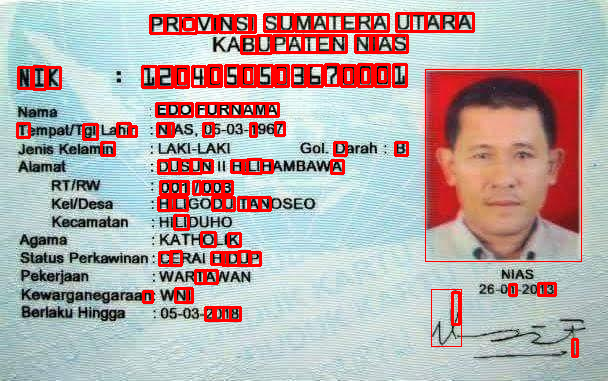

In [15]:
ktp = cv.imread("/content/drive/MyDrive/img_python/content/img_week7/ktp5.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

cv2_imshow(ktp)